In [2]:
import torch
from train import Trainer
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [ ]:
def test(model, input_text):
    """
    Test the model by providing a sequence of text and predicting the next character.
    """
    model.model.eval()
    with torch.no_grad():

        input_indices = [model.dataloader.stoi[char] for char in input_text]
        x_test = torch.tensor(input_indices)
        
        output = model.model(x_test) 

        # predicted_index = torch.argmax(output[-1,:]).item()  
        proba = torch.softmax(output[-1, :], dim=-1)
        predicted_index = torch.multinomial(proba, 1).item()
        
        predicted_letter = [k for k, v_ in model.dataloader.stoi.items() if v_ == predicted_index]

    
    return predicted_letter

100%|██████████| 6000/6000 [05:18<00:00, 18.86it/s]


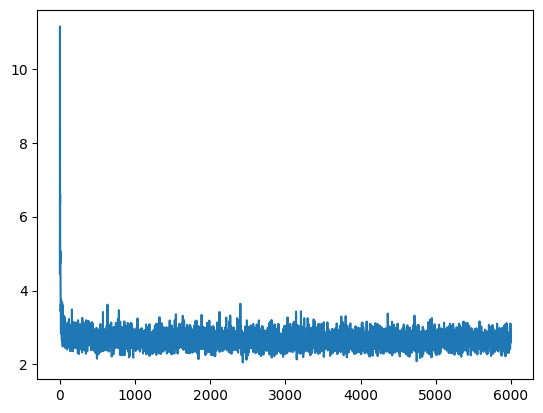

In [29]:
train = Trainer("shakespeare-data.txt", 65, 768, 128, 8, 12, 0.001, 6000)
train.run()
train.save_model()

plt.plot(train.running_loss)
plt.show()

In [38]:
# train = Trainer("shakespeare-data.txt", 50, 128, 64, 8, 12, 0.001, 6000)
# train.load_model()

phrase = "First Gentleman: "
phrase_final = "First Gentleman: "

for _ in range(1000) : 

    lettre = test(train, phrase)
    phrase_final += phrase[0]
    phrase = phrase[1:] + lettre[0]
    


print(phrase_final)

First Gentleman: First Gentleman: chatr.
Ie y marrgiolllderathede berd foushait borthyothe ty sountonderd
IUSe as colime'dldont owikimuprt tusferutotithf.
Honss


Abere's te;
Anmende opugertoruitet o Yougharearalidortoor.
Ortraritorey cosureris, sth fitourrton;
TOLubererimpre lorererry, th t ous mangur,
Heloot mpr irser.

KIOKI'serer?
HENRYiksee rst.
Wha ry wirory y rt tourr;
I aitotlyorer; ourue:
O:

INEShulitre:
HENRYeroorelkeay ofereat ste

QUS:

RYouer'ly kimu itoupounthale atonsomaur y,'thatover sealandserinorir:
TAnithomery mpirthat kin IOre
IN hr lior.
HINING y cutergseryor.
He I'lfototy CHENighand within, to VI r ss arar ad; aimprfr he ueetrr serandere Whira  f,
A:

HE sand n herrer fert y ter, tofrrderr cavor.
ANOKI spererissatoy otot t are k, ouenoushesug fonse ret deere red non dacllyotrotie,
I de's
Aue w,


A wirshamayoduler hessilveritor tougharthe me

O:
Fo;
A:
Weiay furotersacro,
Thapromy;

Whe to as ou,
Thy u sprnono fere, der.
TI'shin lld LUSyorysusshan.
Sil'fus sigus 